In [6]:
import sys    
print('Running on Python version: {}'.format(sys.version))


Running on Python version: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
/home/user/safe2/neuronunit/neuronunit/examples


In [27]:
from neuronunit.tests.fi import RheobaseTestP
tests = pickle.load(open("processed_multicellular_constraints.p","rb"))
nu_tests = tests['Hippocampus CA1 pyramidal cell'].tests
from bluepyopt.ephys.models import ReducedCellModel
import numpy
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
from bluepyopt.ephys.models import ReducedCellModel
import bluepyopt.ephys as ephys
from neuronunit.optimisation.brian_glif_model_parameters import transcribe_units
import sciunit, neuronunit, quantities
from neuronunit.tests.dm import *
import time
from neuronunit.tests import dm #this is me importing the Druckman tests
from neuronunit.tests import RheobaseTestP, fi, RheobaseTest 
from neuronunit.models.reduced import ReducedModel
from neuronunit.optimisation.data_transport_container import DataTC


(-75, -56)


In [44]:

tests = pickle.load(open("processed_multicellular_constraints.p","rb"))
nu_tests = tests['Hippocampus CA1 pyramidal cell'].tests
#rp = RheobaseTestP(observation = nu_tests[0].observation)

from neuronunit.optimisation.brian_glif_model_parameters import MODEL_PARAMS as MODEL_PARAMS_depreciated

IZHI_cell = ephys.models.ReducedCellModel(
        name='NEURON',
        params=MODEL_PARAMS_depreciated["NEURON"],backend="NEURON") 
dtc = DataTC()
dtc.attrs = IZHI_cell.attrs
dtc.ampl=0
dtc.attrs_raw = {'C':89.7960714285714, 'a':0.01, 'b':15, 'c':-60, 'd':10,\
         'k':1.6, 'vPeak':(86.364525297619-65.2261863636364),\
         'vr':-65.2261863636364, 'vt':-50}


dtc.attrs = transcribe_units(dtc.attrs_raw)
IZHI_cell.attrs = dtc.attrs
start0 = time.time()
rtp = RheobaseTestP(observation = nu_tests[0].observation)
pred0 = rtp.generate_prediction(IZHI_cell)
end0 = time.time()
#print(IZHI_cell.attrs)

start1 = time.time()
rt = fi.RheobaseTest(observation = nu_tests[0].observation)
pred1 = rt.generate_prediction(IZHI_cell)
end1 = time.time()

print('parallel Rheobase search time NEURON ', end0-start0)
print('serial Rheobase search time NEURON ',end1-start1)


print('speed up {0}'.format(end1-start1/end0-start0))

time taken on block 5.4697651863098145 
time taken on block 20.01983618736267 
parallel Rheobase search time NEURON  5.629171848297119
serial Rheobase search time NEURON  20.186147212982178
speed up 24.81537914276123


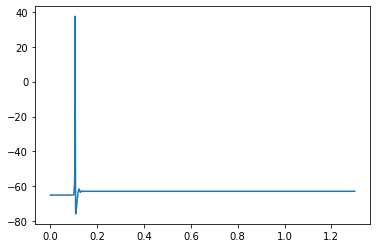

time taken on block 0.7884373664855957 
elapsed parallel:  0.7886583805084229
time taken on block 0.25836706161499023 


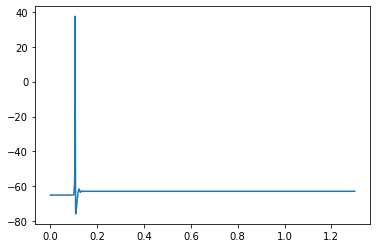

elapsed serial:  0.2596423625946045


In [43]:
explore_ranges = {'E_Na' : (40,70), 'E_K': (-90.0,-75.0)}

attrs = { 'g_K' : 36.0, 'g_Na' : 120.0, 'g_L' : 0.3, \
         'C_m' : 1.0, 'E_L' : -54.387, 'E_K' : -77.0, 'E_Na' : 50.0, 'vr':-65.0 } 

cond_model = ephys.models.ReducedCellModel(
        name='HH',
        params=MODEL_PARAMS_depreciated["HH"],backend="HH") 


#model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('HH'))
cond_model.attrs = attrs
cond_model.attrs = attrs
iparams = {}
iparams['injected_square_current'] = {}
iparams['injected_square_current']['amplitude'] = 1.98156805*pq.pA
iparams['injected_square_current']['amplitude'] = 2.98156805*pq.pA

DELAY = 100.0*pq.ms
DURATION = 1000.0*pq.ms
iparams['injected_square_current']['delay'] = DELAY
iparams['injected_square_current']['duration'] = int(DURATION)
bf = time.time()
cond_model.inject_square_current(iparams)
vm = cond_model.get_membrane_potential()
af = time.time()
plt.plot(vm.times,vm)
plt.show()

#volts = [v[0] for v in vm ]
#print(len(vm[0]),len(vm.times))


bfp = time.time()
#model = ReducedModel(LEMS_MODEL_PATH, name= str('vanilla'), backend=('HH', {'DTC':dtc}))
#model._backend.cell_name = str('vanilla')
#rt = RheobaseTestP(obs_frame['Dentate gyrus basket cell']['Rheobase'])
pred0 = rt.generate_prediction(cond_model)
afp = time.time()
#print(model.attrs)
print('elapsed parallel: ',afp-bfp)


bfs = time.time()
#model = ReducedModel(LEMS_MODEL_PATH, name= str('vanilla'), backend=('HH', {'DTC':dtc}))
#model._backend.cell_name = str('vanilla')

#rt = RheobaseTest(obs_frame['Dentate gyrus basket cell']['Rheobase'])
pred0 = rtp.generate_prediction(cond_model)
afs = time.time()
#print(model.attrs)
plt.plot(vm.times,vm)
plt.show()
print('elapsed serial: ',afs-bfs)


In [ ]:

import pdb
with open(electro_path,'rb') as f:
    (obs_frame,test_frame) = pickle.load(f)
use_test = test_frame["Neocortex pyramidal cell layer 5-6"]


In [ ]:
use_test[0].observation
#from neuronunit.tests import RheobaseP
from neuronunit.tests.fi import RheobaseTestP# as discovery

rtp = RheobaseTestP(use_test[0].observation)
use_test[0] = rtp

In [ ]:
explore_ranges = {'E_Na' : (40.0,70.0), 'E_K': (-90.0,-75.0), 'g_K':(30,40), 'g_Na':(100.0,140.0), 'g_L':(0.1,0.5), 'E_L':(-60.0,-45.0)}

attrs = { 'g_K' : 36.0, 'g_Na' : 120.0, 'g_L' : 0.3, \
         'C_m' : 1.0, 'E_L' : -54.387, 'E_K' : -77.0, 'E_Na' : 50.0, 'vr':-65.0 } 

    
from neuronunit.optimization import optimization_management as om
print(test_frame)    
MU = 12
NGEN = 25
cnt = 1
#hc = { 'g_L' : 0.3, 'E_L' : -54.387,
hc = {'vr':-65.0, 'C_m':1.0 } 

npcl, DO = om.run_ga(explore_ranges,NGEN,use_test,free_params=explore_ranges.keys(), hc = hc, NSGA = True, MU = MU,model_type='HH')
    


In [ ]:
attrs = {'cm': 0.20000000000000001,
 'e_rev_E': 0.0,
 'e_rev_I': -80.0,
 'e_rev_K': -90.0,
 'e_rev_Na': 50.0,
 'e_rev_leak': -65.0,
 'g_leak': 0.01,
 'gbar_K': 6.0,
 'gbar_Na': 20.0,
 'i_offset': 0.0,
 'tau_syn_E': 0.20000000000000001,
 'tau_syn_I': 2.0,
 'v_offset': -63.0}

#   def __init__(self, 
# I_ampl=10., g_leak=0.3,
# g_K=36., g_Na=120., V_leak=-54.402, V_K=-77., V_Na=50.):

dtc.attrs = attrs
bfp = time.time()
#model = ReducedModel(LEMS_MODEL_PATH, name= str('vanilla'), backend=('HH', {'DTC':dtc}))
model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('HHpyNN', {'DTC':dtc}))

rt0 = RheobaseTestP(obs_frame['Dentate gyrus basket cell']['Rheobase'])
pred0 = rt.generate_prediction(model)
afp = time.time()
print('elapsed parallel: ',afp-bfp)


bfs = time.time()
#model = ReducedModel(LEMS_MODEL_PATH, name= str('vanilla'), backend=('HH', {'DTC':dtc}))
model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('HHpyNN', {'DTC':dtc}))

rt1 = RheobaseTest(obs_frame['Dentate gyrus basket cell']['Rheobase'])
pred1 = rt.generate_prediction(model)
afs = time.time()


print(model.attrs)
plt.plot(vm.times,vm)
plt.show()
print('elapsed Serial: ',afs-bfs)
print(rt0,rt1)


In [ ]:
attrs = { 'gK' : 36.0, 'gNa' : 120.0, 'gL' : 0.3, 'Cm' : 1.0, 'Vl' : -10.402, 'VK' : -12.0, 'VNa' : -115, 'vr':-58.402 } 

C_m = 1
V_Na = -115
V_K = 12
V_l = -10.613
g_Na = 120
g_K = 36
g_l = 0.3

model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('HH'))
model.attrs = attrs
iparams['injected_square_current']['amplitude'] = 15.6805*pq.pA

model.inject_square_current(iparams)
vm = model.get_membrane_potential()
af = time.time()
#volts = [v[0] for v in vm ]
print(len(vm[0]),len(vm.times))
plt.plot(vm.times,vm)

len(vm)
len(vm.times)
np.shape(vm)
print(vm[6000])
print(vm[5000])
print(vm[0])

In [ ]:
start4 = time.time()

model = ReducedModel(LEMS_MODEL_PATH, name= str('vanilla'), backend=('RAW'))
rt = fi.RheobaseTestP(obs_frame['Dentate gyrus basket cell']['Rheobase'])
pred1 = rt.generate_prediction(model)
end4 = time.time()


start3 = time.time()

model = ReducedModel(LEMS_MODEL_PATH, name= str('vanilla'), backend=('RAW'))

rt = fi.RheobaseTest(obs_frame['Dentate gyrus basket cell']['Rheobase'])
pred1 = rt.generate_prediction(model)
end3 = time.time()

print(pred1)
ir_currents = {}
ir_currents = pred1['value']
standard = 1.5*ir_currents
standard*=1.5
strong = 3*ir_currents
print(standard,strong,ir_currents)



print('parallel Rhsearch time RAW', end4-start4)
print('serial Rhsearch time RAW',end3-start3)

print(pred)
#for i in npcl['pf'][0:2]:
iparams = {}
iparams['injected_square_current'] = {}
iparams['injected_square_current']['amplitude'] = pred1['value']
model = None
model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
#model.set_attrs(i.dtc.attrs)

#['amplitude']  = dtc.vtest[k]['injected_square_current']['amplitude']
DELAY = 100.0*pq.ms
DURATION = 1000.0*pq.ms
iparams['injected_square_current']['delay'] = DELAY
iparams['injected_square_current']['duration'] = int(DURATION)
model.inject_square_current(iparams)
n_spikes = len(model.get_spike_train())

if n_spikes:
    print(n_spikes)
    #print(i[0].scores['RheobaseTestP']*pq.pA)
    plt.plot(model.get_membrane_potential().times,model.get_membrane_potential())#,label='ground truth')
    plt.legend()
print(obs_frame['Dentate gyrus basket cell']['Rheobase'])


In [ ]:
#speed_up= (end1-start1)/(end0-start0)
#print(speed_up, 'speed up for NEURON')
speed_up= (end3-start3)/(end4-start4)
print(speed_up, 'speed up (slow down) for rawpy')

These results show that parallel rheobase is ~3.5-7 times faster for NEURON, but slower for numba jit depending on model.

This makes sense, because numba jit evaluations are over so quickly, it rivals the time, for interprocessor communication, not so with NEURON simulations, where simulation takes a long time.

The reason parallel is faster given interprocessor comm speed < sim evaluation time, is because in the case of binary search.

For each sim evaluation, the search engine only narrows by 50%.

In the parallel case, 8 simultaneous sim evaluations, are able to narrow the search interval space, by 7/8ths.

This fast narrowing of intervals is what makes the parallel case faster than the binary case.

In [ ]:

tests = [AP12AmplitudeDropTest(standard), 
    AP1SSAmplitudeChangeTest(standard), 
    AP1AmplitudeTest(standard), 
    AP1WidthHalfHeightTest(standard), 
    AP1WidthPeakToTroughTest(standard), 
    AP1RateOfChangePeakToTroughTest(standard), 
    AP1AHPDepthTest(standard), 
    AP2AmplitudeTest(standard), 
    AP2WidthHalfHeightTest(standard), 
    AP2WidthPeakToTroughTest(standard), 
    AP2RateOfChangePeakToTroughTest(standard), 
    AP2AHPDepthTest(standard), 
    AP12AmplitudeChangePercentTest(standard), 
    AP12HalfWidthChangePercentTest(standard), 
    AP12RateOfChangePeakToTroughPercentChangeTest(standard), 
    AP12AHPDepthPercentChangeTest(standard), 
    AP1DelayMeanTest(standard), 
    AP1DelaySDTest(standard), 
    AP2DelayMeanTest(standard), 
    AP2DelaySDTest(standard), 
    Burst1ISIMeanTest(standard), 
    Burst1ISISDTest(standard), 
    InitialAccommodationMeanTest(standard), 
    SSAccommodationMeanTest(standard), 
    AccommodationRateToSSTest(standard), 
    AccommodationAtSSMeanTest(standard), 
    AccommodationRateMeanAtSSTest(standard), 
    ISICVTest(standard), 
    ISIMedianTest(standard), 
    ISIBurstMeanChangeTest(standard), 
    SpikeRateStrongStimTest(strong), 
    AP1DelayMeanStrongStimTest(strong), 
    AP1DelaySDStrongStimTest(strong), 
    AP2DelayMeanStrongStimTest(strong), 
    AP2DelaySDStrongStimTest(strong), 
    Burst1ISISDStrongStimTest(strong),
    Burst1ISIMeanStrongStimTest(strong)]

AHP_list = [AP1AHPDepthTest(standard), 
    AP2AHPDepthTest(standard), 
    AP12AHPDepthPercentChangeTest(standard) ] 


In [ ]:
print(ir_currents)
print(standard)
print(strong)


In [ ]:
start2 = time.time()

model = ReducedModel(LEMS_MODEL_PATH, name= str('vanilla'), backend=('RAW'))

    
for i, test in enumerate(tests):
    mean = test.generate_prediction(model)['mean']
    
    

    #print(mean,test)
stop2 = time.time()
delta2 = stop2-start2
print('serial time: ',stop2-start2)

'''
USING NEURON WOULD TAKE HALF AN HOUR
start3 = time.time()
model = ReducedModel(LEMS_MODEL_PATH, name= str('vanilla'), backend=('NEURON', {'DTC':dtc}))
model.atts = dtc.attrs


for i, test in enumerate(tests):
    mean = test.generate_prediction(model)['mean']
    #print(mean, tests)
stop3 = time.time()
print(stop3-start3)
'''

In [ ]:
# can do these tests in parallel:
import dask.bag as db
import multiprocessing
npart = multiprocessing.cpu_count()


start5 = time.time()
bag = db.from_sequence(tests, npartitions = npart)
means = list(bag.map(takes_tests).compute())    
end5 = time.time()
#print(end5-start5)

print(means)
print('parallel time: ',end5-start5)
print('speed up:',delta2/(end5-start5))


In [ ]:
dmtests = dm.Druckmann2013Test
d_tests = []
for d in dir(dm):
    if "Test" in d:
        exec('d_tests.append(dm.'+str(d)+')')
#print()
dt = d_tests[1:-1]
print(dt)

In [ ]:
import quantities as pq
current_amplitude = {'mean': 106.7 * pq.pA, 'n': 1, 'std': 0.0 * pq.pA}
test = dm.AP12AmplitudeChangePercentTest(current_amplitude)

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
electro_path = str(os.getcwd())+'all_tests.p'

assert os.path.isfile(electro_path) == True
with open(electro_path,'rb') as f:
    (obs_frame,test_frame) = pickle.load(f)


rt = RheobaseTestP(obs_frame['Dentate gyrus basket cell']['Rheobase'])

pred = rt.generate_prediction(model)
print(pred)
#for i in npcl['pf'][0:2]:
iparams = {}
iparams['injected_square_current'] = {}
iparams['injected_square_current']['amplitude'] = pred['value']
model = None
model = ReducedModel(LEMS_MODEL_PATH,name = str('vanilla'),backend = ('RAW'))
#model.set_attrs(i.dtc.attrs)

#['amplitude']  = dtc.vtest[k]['injected_square_current']['amplitude']
DELAY = 100.0*pq.ms
DURATION = 1000.0*pq.ms
iparams['injected_square_current']['delay'] = DELAY
iparams['injected_square_current']['duration'] = int(DURATION)
model.inject_square_current(iparams)
n_spikes = len(model.get_spike_train())

if n_spikes:
    print(n_spikes)
    #print(i[0].scores['RheobaseTestP']*pq.pA)
    plt.plot(model.get_membrane_potential().times,model.get_membrane_potential())#,label='ground truth')
    plt.legend()
print(obs_frame['Dentate gyrus basket cell']['Rheobase'])
    
    

In [ ]:
print(model)
help(dt[0])
dt = dt[0]()
dt[0].generate_prediction(model)


In [ ]:
'''
import pdb
for d in dt:
    pdb.set_trace()
    #dmtO = d(pred['value'])#obs_frame['Dentate gyrus basket cell']['Rheobase'])
print(dmt0)
'''